# プロットの作り方 How to make plots

このノートブックでは、Python の Matplotlib を使って、論文用のプロットへの投稿に耐えうる品質の図を簡単に作成する方法を紹介します。

### ポイント
1. **図のサイズ**: 多くの学術誌では特定の幅が求められる。Single columnで3.45インチ、Double columnで7.2 インチなど。これをあらかじめ指定して出力すると見栄えが統一されるので良い。 
2. **高解像度かつ複数形式**: 図は PNG と PDF（ベクター形式）の両方で出力し保存する。背景色は白（white facecolor）にし、余白は tight に設定する。場合によってはベクター形式のファイルをIllustratorなどで調整する。 
3. **フォントサイズ**: 学術誌では、最終印刷時に 6～8 pt 程度の小さめかつ読みやすいフォントが一般的。
4. **軸の範囲**: データが全部入る範囲を指定するとともに、原点 (0,0) を普通は含める。
5. **色覚特性に配慮した配色**: 線が2本だけの場合は、緑とマゼンタなどの色覚特性に配慮した組み合わせが有効。3本以上になる場合は、色覚特性に配慮したパレットを選ぶ（デフォルトは微妙な場合が多い）。物理系では白黒文化を踏襲し、markerの形で区別する場合もまだ多用されている。

In this notebook, we demonstrate how to create high-quality figures suitable for publication in academic journals using Python’s Matplotlib.

### Key Points
1. **Figure Size**: Many journals specify particular figure widths, such as 3.45 inches for single-column or 7.2 inches for double-column. Predefining these dimensions ensures a consistent appearance.
2. **High Resolution and Multiple Formats**: Save your figures in both PNG and PDF (vector) formats. Set the facecolor to white and use tight bounding for neat margins. In some cases, you may want to refine vector graphics using software like Illustrator.
3. **Font Size**: Journals typically use a small yet readable font around 6–8 pt in the final printed version.
4. **Axes Range**: Make sure the entire dataset is visible and typically include the origin (0,0).
5. **Color-Blind-Friendly Palettes**: When plotting only two lines, a green–magenta combination is a good color-blind-friendly choice. For three or more lines, consider an appropriate palette (the default palette may not be ideal). In many physics communities, a legacy preference for black-and-white printing remains, where different markers are used to distinguish data.



In [30]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from google.colab import files
    in_colab = True
except ImportError:
    in_colab = False


# -------------------------------------------------------
# Parameters you might adjust for your own needs　パラメータ調整
# -------------------------------------------------------
font_size = 8  # Font size for all elements (usually 6,7, or 8) 全てのフォントサイズを統一 (6, 7, 8 が一般的)
single_column_width = 3.45  # inches, approximate single-column インチ数で指定 (Single columnの幅)
double_column_width = 7.2   # inches, approximate double-column インチ数で指定 (Double columnの幅)
height = 2.8               # Decide on a reasonable height　高さを指定

plt.rcParams.update({
    'font.family': 'Arial', # Common to choose Sans-serif fonts like Arial for figures. Arial などSans-serifフォントを図に選ぶことが一般的
    'font.size': font_size,
    'axes.labelsize': font_size,
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'legend.fontsize': font_size,
    'pdf.fonttype': 42,      # To ensure editable text in Illustrator イラストレーターで編集可能なテキストを確保するため
    'ps.fonttype': 42        # Same for PS Postscript 用にも同様
})

# -------------------------------------------------------
# Example data　データの例
# -------------------------------------------------------
x = np.linspace(0, 10, 100)
y1 = np.sin(x) +1
y2 = np.sin(x) +2
y3 = np.sin(2*x)+2

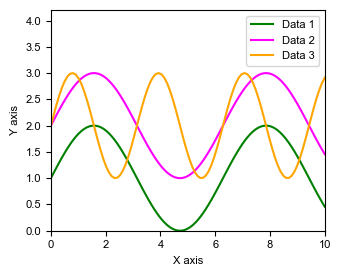

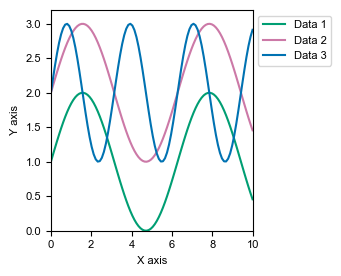

In [31]:
# -------------------------------------------------------
# green, magenta, orange lines with legend in a single column plot 緑, マゼンタ, オレンジの線を含む凡例付きのシングルカラムプロット
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(single_column_width, height))

ax.plot(x, y1, color='green', label='Data 1')
ax.plot(x, y2, color='magenta', label='Data 2')
ax.plot(x, y3, color='orange', label='Data 3')
ax.set_xlim(0, 10)  # includes x=0 explicitly
ax.set_ylim(0, 4.2)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.legend()
plt.tight_layout()

fig.savefig('./tutorial_plots/single_column_plot.png', dpi=300, facecolor='white', bbox_inches='tight')
fig.savefig('./tutorial_plots/single_column_plot.pdf', facecolor='white', bbox_inches='tight')

# -------------------------------------------------------
# user-defined color を使う場合
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(single_column_width, height))

colors_cb = ['#009E73', '#CC79A7', '#0072B2']
ax.plot(x, y1, color=colors_cb[0], label='Data 1')
ax.plot(x, y2, color=colors_cb[1], label='Data 2')
ax.plot(x, y3, color=colors_cb[2], label='Data 3')
ax.set_xlim(0, 10)
ax.set_ylim(0, 3.2)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Place the legend outside the plot プロットの外に凡例を配置
plt.tight_layout()

fig.savefig('./tutorial_plots/plot_user_colors.png', dpi=300, facecolor='white', bbox_inches='tight')
fig.savefig('./tutorial_plots/plot_user_colors.pdf', facecolor='white', bbox_inches='tight')

if in_colab:
    files.download('./tutorial_plots/single_column_plot.png')
    files.download('./tutorial_plots/single_column_plot.pdf')
    files.download('./tutorial_plots/plot_user_colors.png')
    files.download('./tutorial_plots/plot_user_colors.pdf')


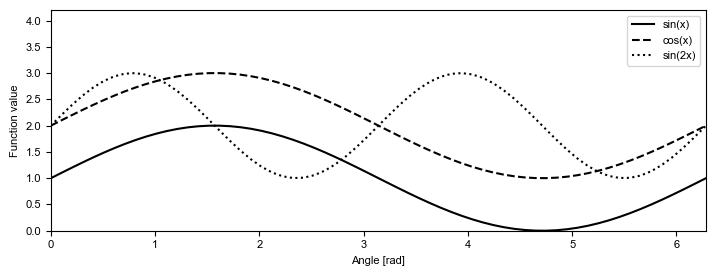

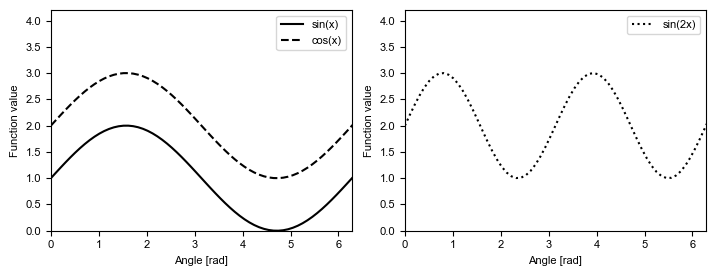

In [32]:
# -------------------------------------------------------
# double column
# -------------------------------------------------------

fig, ax = plt.subplots(figsize=(double_column_width, height))  
ax.plot(x, y1, color='black', linestyle='-', label='sin(x)')
ax.plot(x, y2, color='black', linestyle='--', label='cos(x)')
ax.plot(x, y3, color='black', linestyle=':', label='sin(2x)')

ax.set_xlim(0, 2*np.pi)  # includes x=0
ax.set_ylim(0, 4.2)
ax.set_xlabel('Angle [rad]')
ax.set_ylabel('Function value')
ax.legend(loc='upper right')
plt.tight_layout()

fig.savefig('./tutorial_plots/double_column_plot.png', dpi=300, facecolor='white', bbox_inches='tight')
fig.savefig('./tutorial_plots/double_column_plot.pdf', facecolor='white', bbox_inches='tight')

# -------------------------------------------------------
# include two subplots in a double column plot ダブルカラムプロットに2つのサブプロットを含める
# -------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(double_column_width, height))

axs[0].plot(x, y1, color='black', linestyle='-', label='sin(x)')
axs[0].plot(x, y2, color='black', linestyle='--', label='cos(x)')
axs[0].set_xlim(0, 2*np.pi)
axs[0].set_ylim(0, 4.2)
axs[0].set_xlabel('Angle [rad]')
axs[0].set_ylabel('Function value')
axs[0].legend(loc='upper right')

axs[1].plot(x, y3, color='black', linestyle=':', label='sin(2x)')
axs[1].set_xlim(0, 2*np.pi)
axs[1].set_ylim(0, 4.2)
axs[1].set_xlabel('Angle [rad]')
axs[1].set_ylabel('Function value')
axs[1].legend(loc='upper right')

plt.tight_layout()

fig.savefig('./tutorial_plots/double_column_subplots.png', dpi=300, facecolor='white', bbox_inches='tight')
fig.savefig('./tutorial_plots/double_column_subplots.pdf', facecolor='white', bbox_inches='tight')

if in_colab:
    files.download('./tutorial_plots/double_column_plot.png')
    files.download('./tutorial_plots/double_column_plot.pdf')
    files.download('./tutorial_plots/double_column_subplots.png')
    files.download('./tutorial_plots/double_column_subplots.pdf')


## LaTeX setting

LaTeXでこれらのプロットを使う場合にサイズを合わせるには、そのように指定すればいい(例：3.45インチの場合):

To match the exact figure size in LaTeX (e.g., 3.45 inches), you can use:

```latex
\begin{figure}[htbp]
    \centering
    \includegraphics[width=3.45in]{single_column_plot.png}
    \caption{Caption describing your figure. キャプションで図の説明。}
    \label{fig:my_single_column}
\end{figure}